## Feladat 1 – IQR alapú anomáliák keresése hőmérséklet-adatokban

Egy város napi hőmérsékletét rögzítették 365 napon keresztül.  
A cél, hogy az **IQR (Interkvartilis tartomány)** módszerrel azonosítsd azokat a napokat, amikor a hőmérséklet **szokatlanul magas vagy alacsony** volt.

**Teendők:**
1. Generálj vagy tölts be napi hőmérséklet adatokat (`Temperature` oszlop).  
2. Számítsd ki a Q1, Q3 és IQR értékeket.  
3. Azonosítsd és jelöld meg a kiugró napokat.  
4. Ábrázold a napi hőmérsékletet és színezd ki az anomáliákat (pl. pirossal).  

Tipp: a `matplotlib` `scatter` függvényével könnyen megjeleníthetők a kiugró pontok.



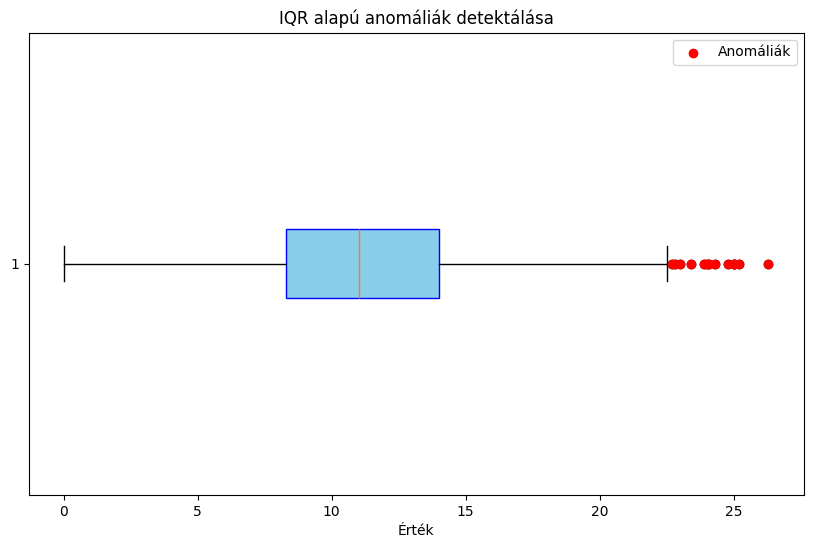

Anomáliák: [25.0, 24.8, 25.0, 24.0, 25.2, 22.7, 22.8, 26.3, 24.3, 23.0, 24.1, 23.4, 23.9]


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df_temp = pd.read_csv(url)
df_temp.Date = pd.to_datetime(df_temp.Date)
df_temp.set_index('Date', inplace=True)
temps = df_temp["Temp"]

Q1 = np.percentile(temps, 25)
Q3 = np.percentile(temps, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies = [x for x in temps if x < lower_bound or x > upper_bound]

plt.figure(figsize=(10, 6))
plt.boxplot(df_temp, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
plt.scatter(anomalies, np.ones(len(anomalies)), color='red', label='Anomáliák', zorder=5)
plt.title('IQR alapú anomáliák detektálása')
plt.xlabel('Érték')
plt.legend()
plt.show()

print(f"Anomáliák: {anomalies}")

## Feladat 2 – Z-score módszer alkalmazása pulzusszám adatokon

Egy okosóra percenkénti **pulzusszám** adatokat rögzített egy nap alatt (kb. 1440 adatpont).  
A feladat az, hogy a **Z-score** segítségével észleld azokat az időpontokat, amikor a pulzus **feltűnően eltér a normáltól** (pl. stressz, futás, hirtelen mozdulat).

**Teendők:**
1. Generálj vagy tölts be valósághű pulzusszám adatokat (60–90 között, néha kiugró 120+ értékekkel).  
2. Számítsd ki a Z-score értékeket.  
3. Jelöld ki azokat az időpontokat, ahol `|Z| > 3`.  
4. Ábrázold a pulzust és az anomáliákat idő függvényében.

Gondolkodj el: mi történik, ha a `threshold` értékét 2-re csökkented?



Anomáliák: [np.float64(113.52731490654722), np.float64(42.58732659930927), np.float64(105.78880808455239)]


<Axes: >

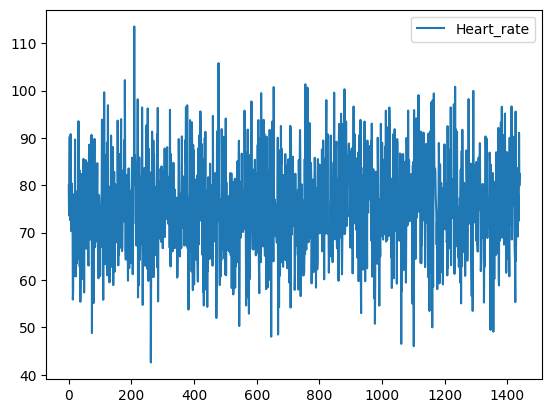

In [70]:
np.random.seed(42)
minutes = np.arange(1440)
n = 140
heart_rate = np.random.normal(75, 10, 1440)


df = pd.DataFrame({
    "Minute": minutes,
    "Heart_rate": heart_rate
})

mean = np.mean(df["Heart_rate"])
std_dev = np.std(df["Heart_rate"])
z_scores = [(x - mean) / std_dev for x in df["Heart_rate"]]

# Anomáliák detektálása (pl. Z-score > 2 vagy < -2)
anomalies = [df["Heart_rate"][i] for i, z in enumerate(z_scores) if abs(z) > 3]

print(f"Anomáliák: {anomalies}")


pd.DataFrame(df["Heart_rate"]).plot()


## Feladat 3 – Isolation Forest alkalmazása banki tranzakciók azonosítására

Egy bank napi szinten több ezer tranzakciót kezel.  
Készíts egy szimulált datasetet, ahol minden sor tartalmazza:
- **Összeg (Amount)** – a tranzakció értéke (pl. 1000–100000 Ft)
- **Időtartam (Duration)** – a tranzakció időtartama másodpercben
- **Hely (Location_ID)** – 1–10 közötti azonosító

A cél, hogy az **Isolation Forest** segítségével kiszűrd a **szokatlan tranzakciókat**.

**Teendők:**
1. Generálj 500 normális és 10 extrém tranzakciót.  
2. Alkalmazd az `IsolationForest` modellt (pl. `contamination=0.02`).  
3. Ábrázold az „Amount vs Duration” teret, és jelöld az anomáliákat pirossal.  
4. Írd ki a gyanús tranzakciók indexeit és értékeit.

Próbáld növelni a `contamination` értékét 0.05-re – hogyan változik az eredmény?


/tmp/ipython-input-874604962.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


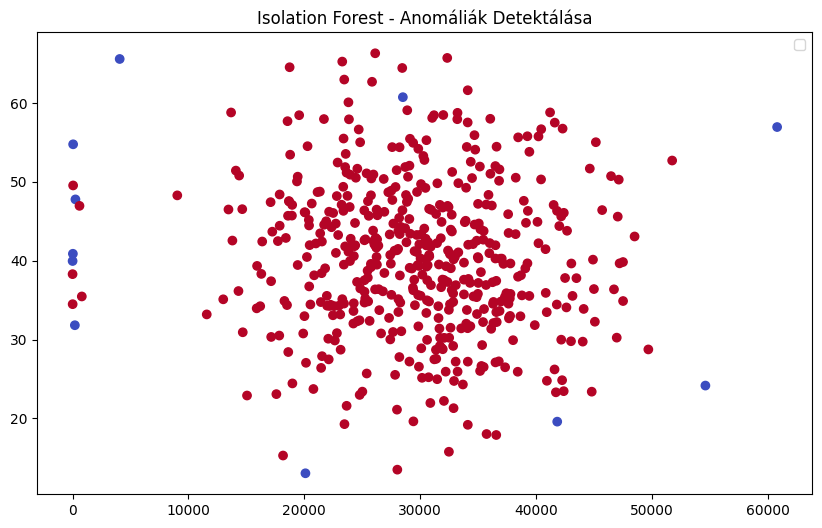

Anomáliák:
           Amount   Duration  Location_ID
61   28514.728187  60.754008    -9.242713
146  20104.394313  13.031134    -0.481375
209  60821.851925  56.964564    13.747884
262   4069.861279  65.600845     7.693780
478  54631.046468  24.160972     0.562539
491  41839.553111  19.582651    17.790996
500    250.000000  47.783611    -0.708446
502    200.000000  31.818011     1.415888
503      5.000000  39.966255    -4.332683
508     30.000000  40.884069    -0.120934
509     51.000000  54.775301    14.270463


In [71]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
Amount = np.random.normal(30000, 8000, 500)
Duration = np.random.normal(40, 10, 500)
Location_ID = np.random.normal(5, 5, 500)

Amount = np.append(Amount, [250, 10, 200, 5, 3, 800, 600, 50, 30, 51 ])
Duration = np.append(Duration, np.random.normal(40, 10, 10))
Location_ID = np.append(Location_ID, np.random.normal(5, 5, 10) )


data = pd.DataFrame({'Amount': Amount, 'Duration': Duration, 'Location_ID': Location_ID})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


model = IsolationForest(contamination=0.02, random_state=42)
model.fit(scaled_data)


predictions = model.predict(scaled_data)
data['Anomaly'] = predictions

plt.figure(figsize=(10, 6))
plt.scatter(data['Amount'], data['Duration'], c=data['Anomaly'], cmap='coolwarm',)
plt.title('Isolation Forest - Anomáliák Detektálása')
plt.legend()
plt.show()


anomalies = data[data['Anomaly'] == -1]
print(f"Anomáliák:\n{anomalies[['Amount', 'Duration', 'Location_ID']]}")

## Feladat 4 – K-Means klaszterezés és anomáliák keresése vásárlási szokásokban

Egy webshop vásárlóit jellemezzük két változóval:
- **Havi költés (Spending)**  
- **Vásárlások száma (Purchases)**  

A cél, hogy a **K-Means** klaszterezés segítségével azonosítsd azokat az ügyfeleket, akik **nem illenek egyik vásárlói csoportba sem**.

**Teendők:**
1. Generálj 200 vásárlót (pl. Spending: 10–1000 €, Purchases: 1–50).  
2. Alkalmazd a K-Means algoritmust 3 klaszterre.  
3. Azonosítsd a „legtávolabbi” pontokat a klaszterközéppontoktól.  
4. Ábrázold a klasztereket és az anomáliákat eltérő színekkel.

Gondolkodj el: milyen esetben számít valaki „anomáliának” egy klaszterben?



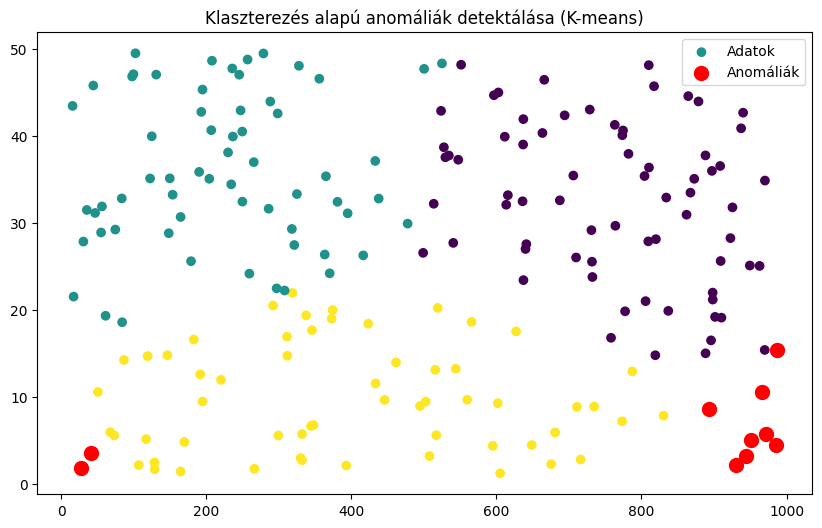

In [72]:
from sklearn.cluster import KMeans


np.random.seed(42)

Spending = np.random.uniform(10, 1000, 200)
Purchases = np.random.uniform(1, 50, 200)

data_4 = pd.DataFrame({
    "Spending": Spending,
    "Purchases": Purchases
})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_4)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

data_4['Cluster'] = kmeans.labels_
data_4['Distance_from_centroid'] = [np.linalg.norm(x - kmeans.cluster_centers_[label]) for x, label in zip(scaled_data, kmeans.labels_)]

threshold = np.percentile(data_4['Distance_from_centroid'], 95)
anomalies = data_4[data_4['Distance_from_centroid'] > threshold]

plt.figure(figsize=(10, 6))
plt.scatter(data_4['Spending'], data_4['Purchases'], c=data_4['Cluster'], cmap='viridis', label='Adatok')
plt.scatter(anomalies['Spending'], anomalies['Purchases'], color='red', label='Anomáliák', s=100)
plt.title('Klaszterezés alapú anomáliák detektálása (K-means)')
plt.legend()
plt.show()

## Feladat 5 – One-Class SVM idősoros szenzoradatokon

Egy ipari szenzor percenként méri a hőmérsékletet egy gyártósoron.  
A One-Class SVM segítségével detektáld a **szokatlan működési időszakokat**.

**Teendők:**
1. Generálj 1000 mérési pontot (átlag 70 °C, szórás 5 °C, néhány extrém 85+ vagy 50–).  
2. Skálázd az adatokat a `StandardScaler`-rel.  
3. Taníts egy `OneClassSVM` modellt (`nu=0.05, kernel='rbf'`).  
4. Ábrázold az idő és a hőmérséklet függvényében a normális és az anomáliás pontokat.

Vizsgáld meg, hogy mi történik, ha `nu=0.1` – több vagy kevesebb anomáliát talál?


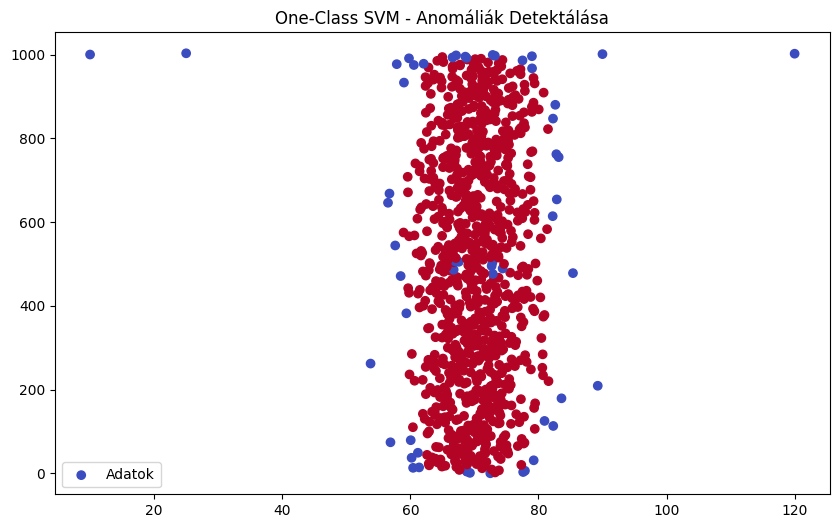

In [73]:
from sklearn.svm import OneClassSVM

np.random.seed(42)

temp = np.random.normal(70, 5, 1000)
temp = np.append(temp, [10, 90, 120, 25 ])
time = np.arange(len(temp))

data_5 = pd.DataFrame({
    "Temp": temp,
    "Time": time
})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_5)

model = OneClassSVM(nu=0.05, kernel="rbf", gamma='scale')
model.fit(scaled_data)

predictions = model.predict(scaled_data)
data_5['Anomaly'] = predictions

plt.figure(figsize=(10, 6))
plt.scatter(data_5['Temp'], data_5['Time'], c=data_5['Anomaly'], cmap='coolwarm', label='Adatok')
plt.title('One-Class SVM - Anomáliák Detektálása')
plt.legend()
plt.show()


## Feladat 6 – Autoencoder idősor: energiafogyasztás anomáliái

Egy háztartás óránkénti **energiafogyasztási** adatait vizsgáljuk (kWh).  
A cél, hogy egy **Autoencoder** modell segítségével megtaláld azokat az időszakokat, amikor a fogyasztás **szokatlanul eltér** a megszokott mintától.

**Teendők:**
1. Generálj 30 napnyi óránkénti adatot (24×30 = 720 pont).  
2. Szimulálj néhány kiugró értéket (pl. extrém nagy fogyasztást).  
3. Taníts egy egyszerű autoencoder hálózatot (encoder–bottleneck–decoder).  
4. Számítsd ki a rekonstrukciós hibát, és azonosítsd az anomáliákat.  
5. Ábrázold az eredményt: kék = normális, piros = anomália.

Próbáld megváltoztatni a hálózat „bottleneck” mélységét – hogyan hat ez a hiba nagyságára?


In [74]:
np.random.seed(42)

hours = np.arange(720)

### Segitség

# Z-score anomáliák – pulzusszám vagy fiziológiai adatok

Dataset: load_breast_cancer() – scikit-learn klasszikus orvosi adatbázisa

Leírás:

- 30 numerikus jellemző (pl. sejtméret, textúra, stb.)
- A Z-score alapú anomáliák jól működnek rajta — keresheted, mely minták térnek el leginkább az átlagtól.
- Feladat: Z-score segítségével detektáld a „szokatlan” sejtmintákat.

In [75]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer(as_frame=True)
df = data.frame
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Isolation Forest – tranzakciós típusú adatok

Dataset: Credit card fraud dataset (scikit-learn beépített alternatíva)
Ez nem közvetlenül van beépítve, de a fetch_covtype() vagy make_classification() szimulálhatja.

Leírás:
- Valósághű „tranzakció” minták, néhány outlier beépíthető mesterségesen.
- Feladat: Isolation Forest segítségével detektáld az anomáliákat.

In [76]:
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(
    n_samples=1000,
    n_features=3,
    n_informative=2,
    n_redundant=0,
    random_state=42
)
data = pd.DataFrame(X, columns=['Amount', 'Duration', 'Location'])
data.head()


,Amount,Duration,Location
0,0.964229,1.995667,0.244143
1,-1.358062,-0.254956,0.502890
2,1.732057,0.261251,-2.214177
3,-1.519878,1.023710,-0.262691
4,4.020262,1.381454,-1.582143


## One-Class SVM – szenzoradatok

Dataset: Sklearn fetch_openml("sensorless_drive_diagnosis")
Többdimenziós, gyártósori motoradatok.

Leírás:
- 48 numerikus érzékelőérték (szenzormérések egy motorból)
- Remekül alkalmas One-Class SVM-re, mert tartalmaz normális és hibás működési mintákat.
- Feladat: megtanítani a normál viselkedést, majd detektálni a hibás működéseket.

In [77]:
from sklearn.datasets import fetch_openml

data = fetch_openml("sensorless_drive_diagnosis", version=1, as_frame=True)
df = data.frame.sample(1000, random_state=42)  # csak mintavétel
df.head()

OpenMLError: Dataset sensorless_drive_diagnosis with version 1 not found.

## Autoencoder – energiafogyasztás vagy időalapú adatok

Dataset: UCI „Household Power Consumption” (előre letöltött CSV), de mintaként:
Leírás:
- Idősoros adat: havi utasszám (de értelmezhető energiafogyasztásként is).
- Használható Autoencoder vagy LSTM alapú rekonstrukciós hibára.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data.head()
